# EE399 HW1
## Ziwen


https://github.com/ZiwenLi0325/EE399.git

In [221]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.io import loadmat
results = loadmat('yalefaces.mat')
X=results['X']

# (a)

Text(0, 0.5, 'j')

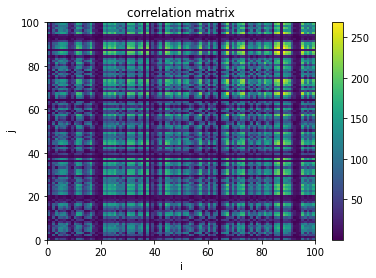

In [222]:
# print(first_100.shape)
C = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        C[i,j] = np.dot(X[:,i],X[:,j])
# print(C)
# print(C.shape)
plt.pcolor(C)
plt.colorbar()
plt.title("correlation matrix")
plt.xlabel("i")
plt.ylabel("j")

# (b)

The index i,j with the largest entry is (88, 88)
The index i,j with the largest entry is (86, 88)


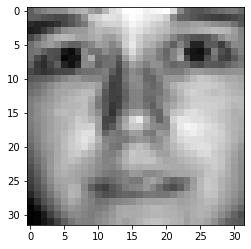

In [223]:
C_remove = C.copy()
# Find the index i,j with the largest entry
i, j = np.unravel_index(C_remove.argmax(), C_remove.shape)

print(f"The index i,j with the largest entry is ({i}, {j})")
np.fill_diagonal(C_remove, 0)

i, j = np.unravel_index(C_remove.argmax(), C_remove.shape)

print(f"The index i,j with the largest entry is ({i}, {j})")
print_copy = X[:,88]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")

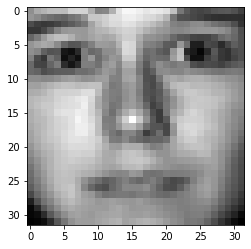

In [224]:
print_copy = X[:,86]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")

In [225]:
# Find the index i,j with the smallest entry
small = 100
for i in range(100):
    for j in range(100):
        if C[i,j] < small and i!=j:
            small = C[i,j] 
            i_index = i
            j_index = j
print(f"The index i,j with the smallest entry is ({i_index}, {j_index})")
print(small)

The index i,j with the smallest entry is (54, 64)
0.002161908881199547


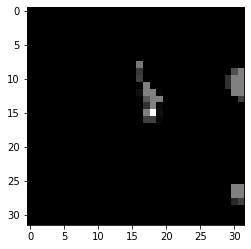

In [226]:
plt.imshow(X[:,64].reshape([32,32]),cmap = "gray")

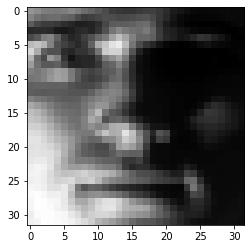

In [227]:
plt.imshow(X[:,54].reshape([32,32]),cmap = "gray")

# (C)

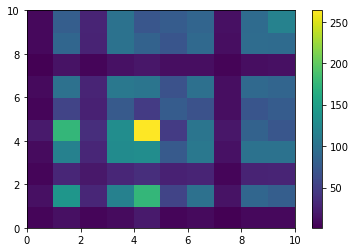

In [228]:
array_index = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
image_set = np.array([X[:,i] for i in array_index])
Y = np.matmul(image_set,np.transpose(image_set))
plt.pcolor(Y)
plt.colorbar()
# print(image_set.shape)
# # print(first_100.shape)
# C = np.zeros([10,10])
# for i in range(10):
#     for j in range(10):
#         C[i,j] = np.dot(image_set[:,i],image_set[:,j])
# # print(C)
# # print(C.shape)
# plt.pcolor(C)
# plt.colorbar()
# plt.title("correlation matrix")
# plt.xlabel("i")
# plt.ylabel("j")

# (d)

In [229]:
Y = np.matmul(X,np.transpose(X))
eigenvalues, eigenvectors = np.linalg.eig(Y)
largest_indices = np.argsort(np.abs(eigenvalues))[::-1][:6]
largest_eigenvectors = eigenvectors[:, largest_indices]
print(eigenvalues[:6])
print(largest_eigenvectors)

[234020.45485389  49038.31530059   8236.53989701   6024.87145793
   2051.49643269   1901.07911482]
[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


# (e)

In [230]:
# Perform SVD on X
U, s, Vt = np.linalg.svd(X)

# Extract the first six principal components
PCs = Vt[:6, :].T
# Normalize principal components to have unit length
PCs_norm = np.linalg.norm(PCs, axis=0)
PCs = PCs / PCs_norm
print(PCs)
# Show the first six principal components
for i in range(6):
    pc = PCs[:, i]
#     pc_image = np.reshape(pc, (32, 32))
#     plt.imshow(pc_image, cmap='gray')
#     plt.title('Principal Component {}'.format(i+1))
#     plt.show()

[[-0.01219331 -0.01938848  0.01691206  0.0204079  -0.01902342 -0.0090084 ]
 [-0.00215188 -0.00195186  0.00143586 -0.01201431  0.00418948 -0.00624237]
 [-0.01056679  0.02471869  0.0384465   0.00397553  0.0384026   0.01580824]
 ...
 [-0.02177117  0.04027773  0.01340245 -0.01641295 -0.01092512 -0.00977639]
 [-0.03015309  0.00219562 -0.01883373 -0.04011563  0.00087341  0.00090316]
 [-0.0257889   0.01553129  0.00643709  0.02679029  0.01260435  0.00304479]]
[[-0.01219331 -0.01938848  0.01691206  0.0204079  -0.01902342 -0.0090084 ]
 [-0.00215188 -0.00195186  0.00143586 -0.01201431  0.00418948 -0.00624237]
 [-0.01056679  0.02471869  0.0384465   0.00397553  0.0384026   0.01580824]
 ...
 [-0.02177117  0.04027773  0.01340245 -0.01641295 -0.01092512 -0.00977639]
 [-0.03015309  0.00219562 -0.01883373 -0.04011563  0.00087341  0.00090316]
 [-0.0257889   0.01553129  0.00643709  0.02679029  0.01260435  0.00304479]]


# (f)

In [231]:
u_1 = U[:,0]
v_1 = eigenvectors[:,0]
l2_norm = np.sqrt(np.sum(np.square(np.abs(u_1)-np.abs(v_1))))
print("The difference of norm between u_1 and v_1 is "+str(l2_norm)+".")

The difference of norm between u_1 and v_1 is 6.535857028199339e-16.


# (g)

[483.75660704 221.44596474  90.75538495  77.62004546  45.29344801
  43.60136597]
(1024, 1024)


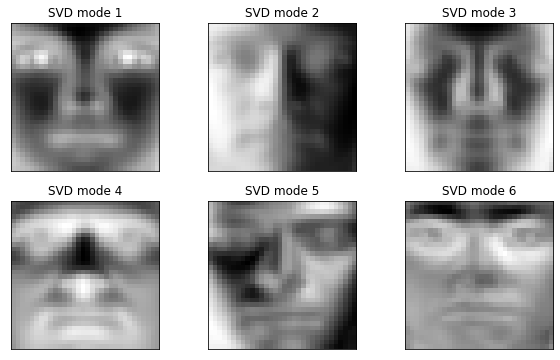

Percentage of variance captured by each mode:
Mode 1: 77.68%
Mode 2: 16.28%
Mode 3: 2.73%
Mode 4: 2.00%
Mode 5: 0.68%
Mode 6: 0.63%


In [232]:
X=results['X']
U, s, Vt = np.linalg.svd(X)
s = s[:6]
print(s)
total_var = np.sum(s**2)

# compute the percentage of variance captured by each mode
var_captured = s**2 / total_var *100

# plot the first 6 SVD modes
fig, axs = plt.subplots(2, 3, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})

print(U.shape)
for i, ax in enumerate(axs.flat):
    ax.imshow(np.reshape(U[:, i], (32, 32)), cmap='gray')
    ax.set_title('SVD mode {}'.format(i+1))

plt.show()

# print the percentage of variance captured by each mode
print('Percentage of variance captured by each mode:')
for i in range(6):
    print('Mode {}: {:.2f}%'.format(i+1, var_captured[i]))